<a href="https://colab.research.google.com/github/gabrielafsz/Projetos-Inova-Talentos/blob/main/Caso_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RESUMO:**  Neste projeto fazemos um webscraping dos dados atualizados de COVID no Brasil retirados do site oficial do governo e fazemos algumas análises, como a evolução dos casos e evolução de casos acumulada.

In [1]:
# usamos o comando wget para fazer o download dos arquivos.
!wget -p https://mobileapps.saude.gov.br/esus-vepi/files/unAFkcaNDeXajurGB7LChj8SgQYS2ptm/35fef75a8803d534bf20c47b594531f5_HIST_PAINEL_COVIDBR_03jun2022.rar

--2022-06-05 15:31:26--  https://mobileapps.saude.gov.br/esus-vepi/files/unAFkcaNDeXajurGB7LChj8SgQYS2ptm/35fef75a8803d534bf20c47b594531f5_HIST_PAINEL_COVIDBR_03jun2022.rar
Resolving mobileapps.saude.gov.br (mobileapps.saude.gov.br)... 54.233.182.28, 54.94.151.129, 54.207.232.124
Connecting to mobileapps.saude.gov.br (mobileapps.saude.gov.br)|54.233.182.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19897518 (19M) [application/x-rar-compressed]
Saving to: ‘mobileapps.saude.gov.br/esus-vepi/files/unAFkcaNDeXajurGB7LChj8SgQYS2ptm/35fef75a8803d534bf20c47b594531f5_HIST_PAINEL_COVIDBR_03jun2022.rar’

mobileapps.saude.go 100%[===================>]  18.98M  8.10MB/s    in 2.3s    

2022-06-05 15:31:29 (8.10 MB/s) - ‘mobileapps.saude.gov.br/esus-vepi/files/unAFkcaNDeXajurGB7LChj8SgQYS2ptm/35fef75a8803d534bf20c47b594531f5_HIST_PAINEL_COVIDBR_03jun2022.rar’ saved [19897518/19897518]

FINISHED --2022-06-05 15:31:29--
Total wall clock time: 3.5s
Downloaded: 1 files, 1

O arquivo baixado está em formato rar. Para fazer a extração precisamos baixar algumas bibliotecas.

In [2]:
pip install pyunpack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install patool 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
dados_covid = '/content/mobileapps.saude.gov.br/esus-vepi/files/unAFkcaNDeXajurGB7LChj8SgQYS2ptm/35fef75a8803d534bf20c47b594531f5_HIST_PAINEL_COVIDBR_03jun2022.rar'

In [5]:
from pyunpack import Archive
import os
Archive(dados_covid).extractall(os.getcwd())

Vamos analisar os dados mais atuais, de 2022.

In [6]:
import pandas as pd
painel_covid = pd.read_csv('/content/HIST_PAINEL_COVIDBR_2022_Parte1_03jun2022.csv', sep=';')

In [7]:
painel_covid.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-01,52,210147125.0,22291507.0,3986,619105,49,21581668.0,90734.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-02,1,210147125.0,22293228.0,1721,619133,28,21581717.0,92378.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-03,1,210147125.0,22305078.0,11850,619209,76,21591847.0,94022.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-04,1,210147125.0,22323837.0,18759,619384,175,21603954.0,100499.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-05,1,210147125.0,22351104.0,27267,619513,129,21615473.0,116118.0,NaN


In [8]:
# tamanho do dataset
n = len(painel_covid)
print('Número de linhas do dataset:', n)

Número de linhas do dataset: 865326


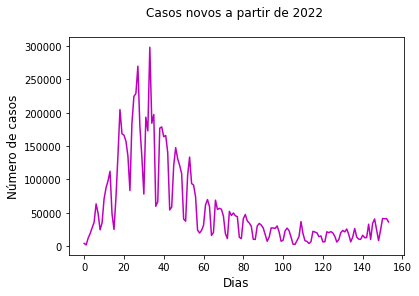

In [9]:
# distribuição de casos novos
casos_novos = painel_covid[painel_covid.estado.isna()].casosNovos
cn = casos_novos.plot(color='m')
cn.set_xlabel("Dias", fontsize=12)
cn.set_ylabel('Número de casos', fontsize=12)
cn.set_title('Casos novos a partir de 2022 \n', fontsize=12);

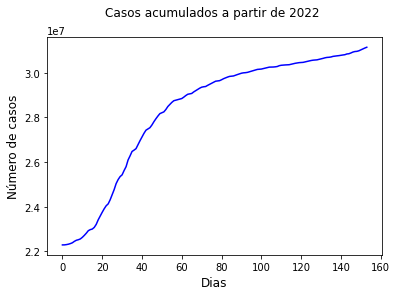

In [10]:
# distribuição acumulada de casos
casos_acumulado = painel_covid[painel_covid.estado.isna()].casosAcumulado
ca = casos_acumulado.plot(color='b')
ca.set_xlabel("Dias", fontsize=12)
ca.set_ylabel('Número de casos', fontsize=12)
ca.set_title('Casos acumulados a partir de 2022 \n', fontsize=12);